# Mask R-CNN demo

This notebook illustrates one possible way of using `maskrcnn_benchmark` for computing predictions on images from an arbitrary URL.

Let's start with a few standard imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

#import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [2]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

Those are the relevant imports for the detection model

In [3]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

We provide a helper class `COCODemo`, which loads a model from the config file, and performs pre-processing, model prediction and post-processing for us.

We can configure several model options by overriding the config options.
In here, we make the model run on the CPU

In [4]:
config_file = "C://Users/USER/pytorch/maskrcnn-benchmark/configs/e2e_0702.yaml"

# update the config options with the config file
a = cfg.merge_from_file(config_file)
cfg.MODEL.WEIGHT = '../tools/model_final.pth'
# manual override some options
b = cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

Now we create the `COCODemo` object. It contains a few extra options for conveniency, such as the confidence threshold for detections to be shown.

In [5]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

Let's define a few helper functions for loading images from a URL

In [6]:
import os
val_path='../datasets/custom/custom_test/Traffic_2/' #this is the validation image data
imglistval = os.listdir(val_path) 

print(imglistval)

['.exports', '.thumbnail', '1.jpg', '10.jpg', '11.jpg', '12.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']


../datasets/custom/custom_test/Traffic_2/1.jpg


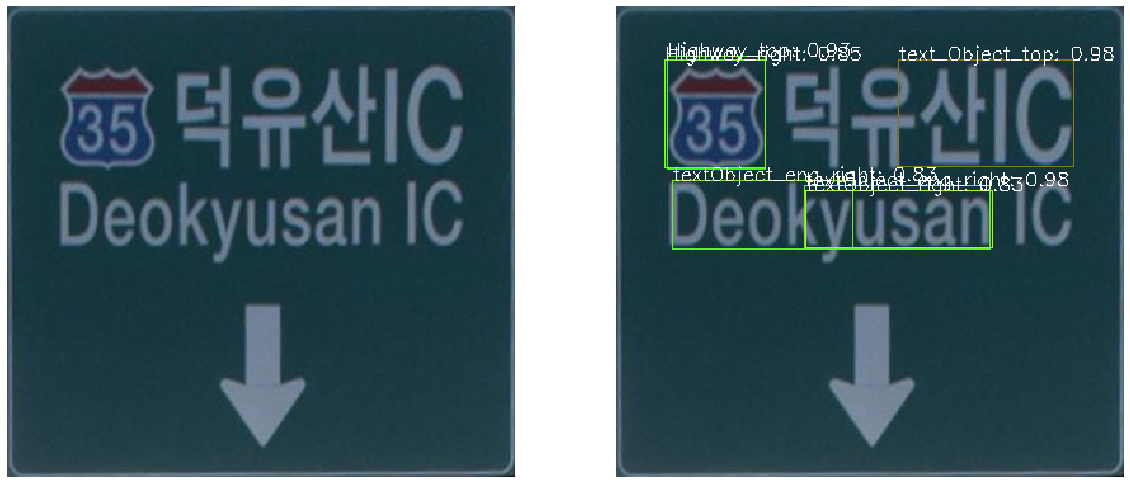

../datasets/custom/custom_test/Traffic_2/10.jpg


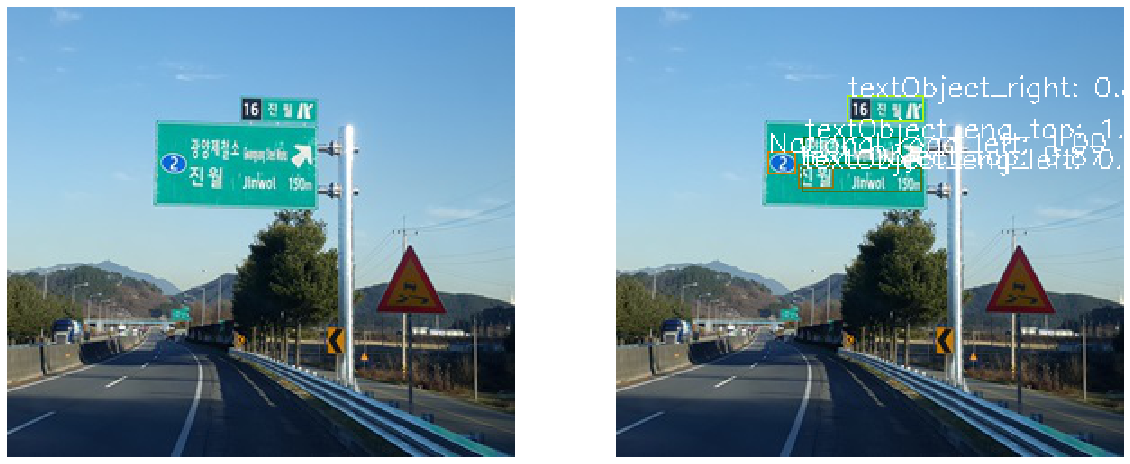

../datasets/custom/custom_test/Traffic_2/11.jpg


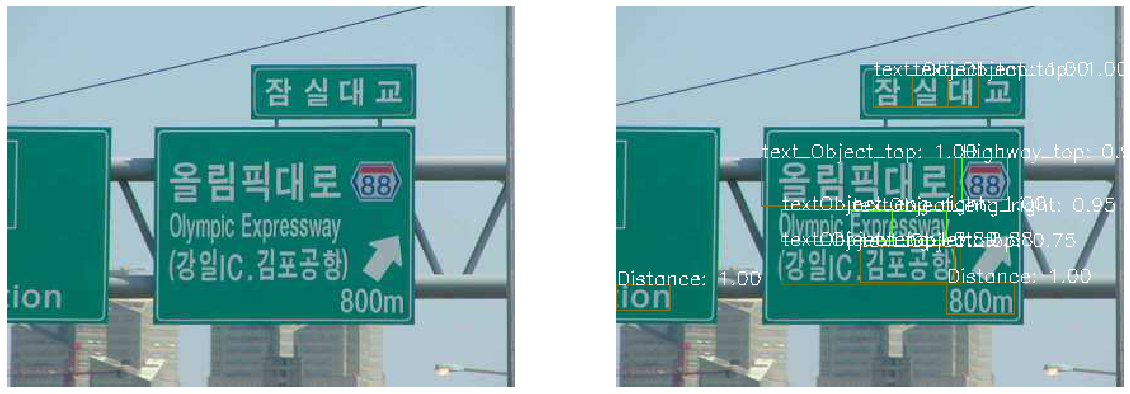

../datasets/custom/custom_test/Traffic_2/12.jpg


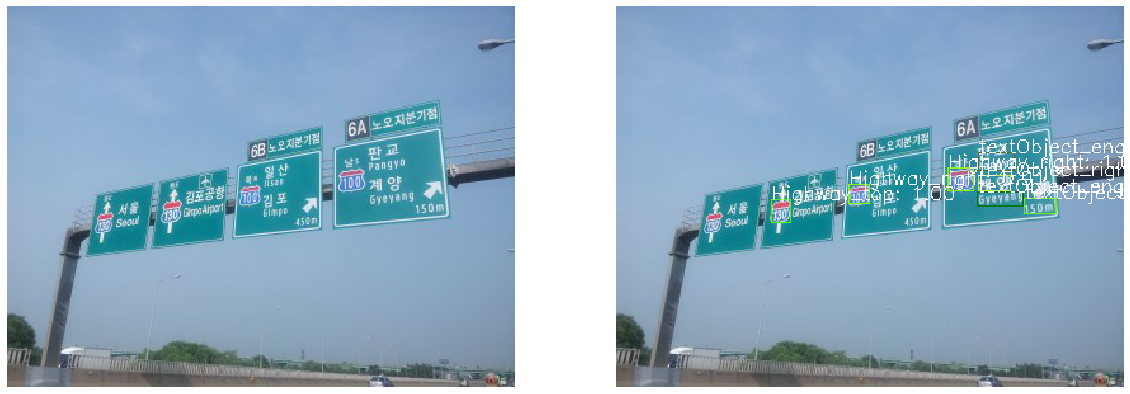

../datasets/custom/custom_test/Traffic_2/2.jpg


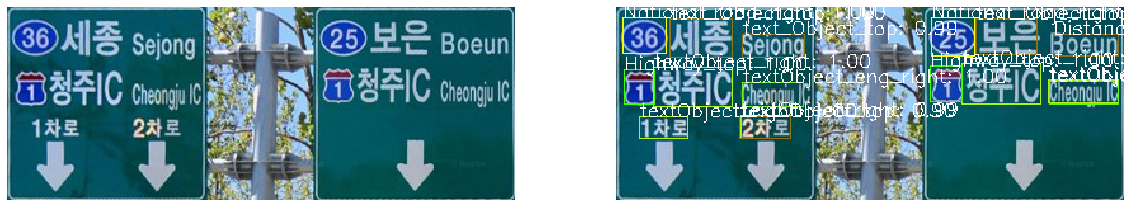

../datasets/custom/custom_test/Traffic_2/3.jpg


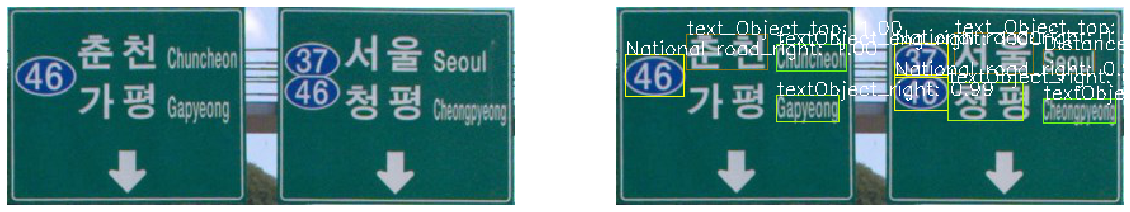

../datasets/custom/custom_test/Traffic_2/4.jpg


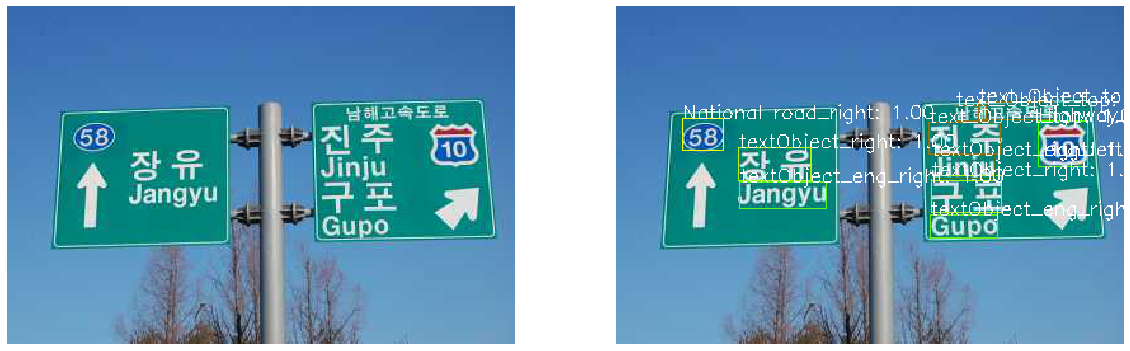

../datasets/custom/custom_test/Traffic_2/5.jpg


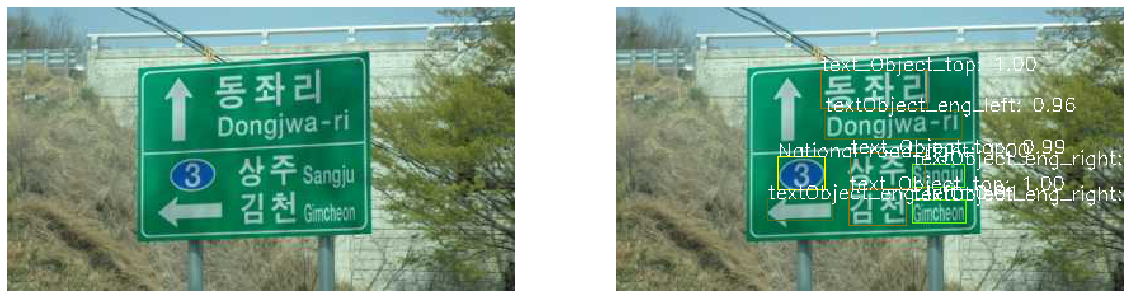

../datasets/custom/custom_test/Traffic_2/6.jpg


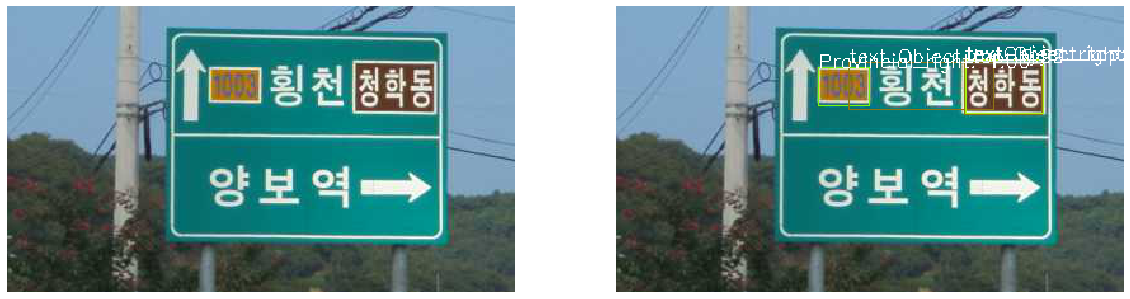

../datasets/custom/custom_test/Traffic_2/7.jpg


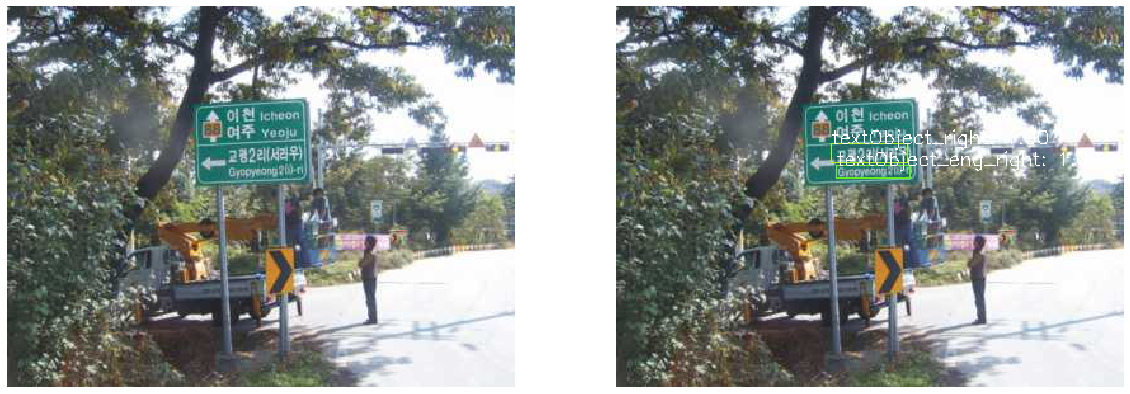

../datasets/custom/custom_test/Traffic_2/8.jpg


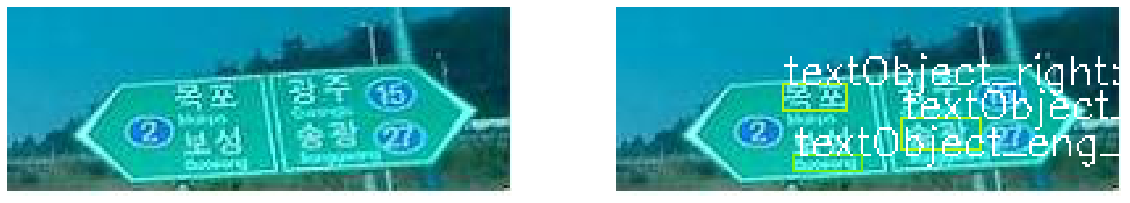

../datasets/custom/custom_test/Traffic_2/9.jpg


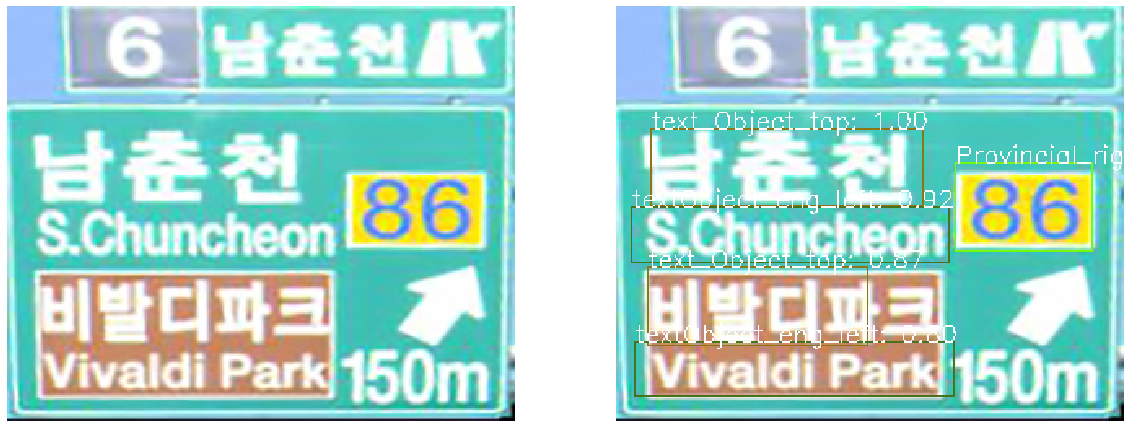

In [7]:
for name in imglistval:
    
    if name.endswith('.jpg'):
        
        imgfile = val_path + name
        print(imgfile)
        pil_image = Image.open(imgfile).convert("RGB")
        image = np.array(pil_image)[:, :, [2, 1, 0]]

        predictions = coco_demo.run_on_opencv_image(image) # forward predict
        plt.subplot(1, 2, 1)
        plt.imshow(image[:,:,::-1])
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(predictions[:,:,::-1])
        plt.axis('off')
        plt.show()